# Prepare Environment

Load necessary modules and attempt to compile the GrOpt library if it isn't already

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from timeit import default_timer as timer

# This attempts to re-compile the library in case it has been changed, mostly for debug, but won't do anything
# if nothing is changed
import subprocess
out = subprocess.run(["python", "setup.py", "build_ext", "--inplace"], stdout=subprocess.PIPE)
import gropt

from helper_utils_paper import *

%matplotlib inline

# Conventional Flow Compensated + Flow Encoded without M2 Compensation

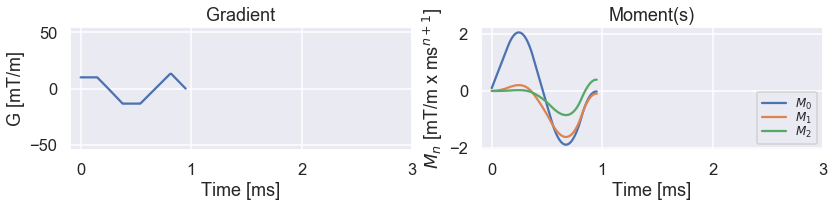

Flow Compensated Waveform:
Zero Gradient Moment = -0.02 mT/m x ms
First Gradient Moment = -0.10 mT/m x ms^2
Gradient waveform duration = 0.96 ms


In [5]:
# Start of parameters to change
G_Max = 50      # Maximum gradient amplitude, mT/m
SR_Max = 100    # Maximum slew rate, mT/m/ms 
g_ss = 10       # Slice select gradient amplitude, mT/m
p_ss = 0.15     # Slice select gradient plateau, ms
# End of parameters to change

params = {}
params['mode'] = 'free'
params['gmax'] = G_Max/1000
params['smax'] = SR_Max
params['dt']= 10e-6
params['g_ss']= g_ss
params['p_ss']= p_ss

# Flow Compensated Waveform
FC, M0S, M1S, M2S, t_ss, G_ss = conventional_flowcomp(params)
mmt, axarr = plot_waveform_flow(FC, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$','$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=4)
axarr[0,0].set_xlim(-0.1,3)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3)
#plt.savefig('ConvFC.pdf')
plt.show(plot_waveform_flow)
print('Flow Compensated Waveform:')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Gradient waveform duration = %.2f ms' % (FC.size*params['dt']*1000))



# CVX Flow Compensated + Flow Encoded with M2 Compensation

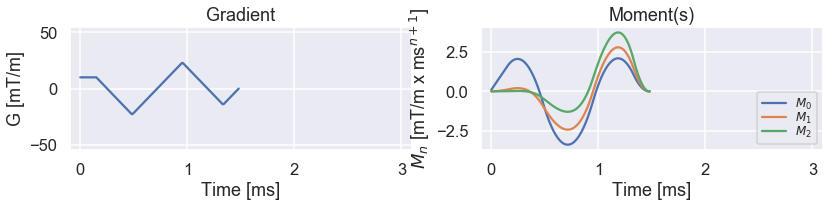

Flow Compensated Waveform:
Zero Gradient Moment = -0.00 mT/m x ms
First Gradient Moment = -0.00 mT/m x ms^2
Second Gradient Moment = 0.00 mT/m x ms^3
Gradient waveform duration = 1.49 ms


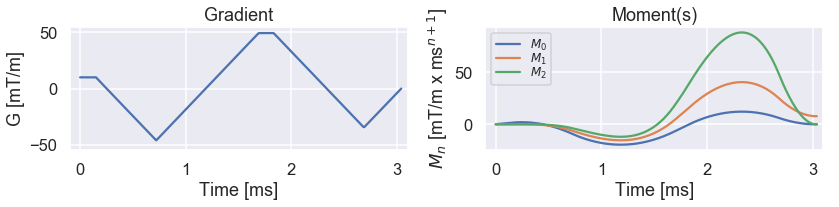



Flow Encoded Waveform (VENC=150cm/s):
Zero Gradient Moment = -0.00 mT/m x ms
First Gradient Moment = 7.83 mT/m x ms^2
Second Gradient Moment = -0.00 mT/m x ms^3
Gradient waveform duration = 3.05 ms


In [8]:
# Flow Compensated Waveform
# Start of parameters to change
G_Max = 50      # mT/m
SR_Max = 100    # mT/m/ms 
g_ss = 10       # Slice select gradient amplitude, mT/m
p_ss = 0.15     # Slice select gradient plateau, ms
# End of parameters to change

params = {}
params['mode'] = 'free'
params['gmax'] = G_Max/1000
params['smax'] = SR_Max
params['dt']= 10e-6
params['g_ss']= g_ss
params['p_ss']= p_ss
FC, M0S, M1S, M2S, t_ss, G_ss = conventional_flowcomp(params)
params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S, 1.0e-4])
params['moment_params'].append([0, 2, t_ss, -1, -1, -M2S, 1.0e-4])
G, T = get_min_TE_free(params, 0.1, 5, verbose = 0)
GFC = np.concatenate((G_ss,G),axis=0)
mmt, axarr = plot_waveform_flow(GFC*1000, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$','$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=4)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
#plt.savefig('CVXFC_M2.pdf')
plt.show(plot_waveform_flow)
print('Flow Compensated Waveform:')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Second Gradient Moment = %.2f mT/m x ms^3' % (mmt[2][-1]))
print('Gradient waveform duration = %.2f ms' % float(GFC.size*params['dt']*1000))


# Flow Encoded Waveform
params['VENC'] = 1.5e-3   # m/ms, equivalent to 150 cm/s
params['M0S'] = M0S
params['M1S'] = M1S
params['G_ss'] = G_ss
FE, DeltaM1 = conventional_flowencode(params)
params['moment_params'] =     [[0, 0, t_ss, -1, -1, -M0S, 1.0e-4]]
params['moment_params'].append([0, 1, t_ss, -1, -1, -M1S+DeltaM1, 1.0e-4])
params['moment_params'].append([0, 2, t_ss, -1, -1, -M2S, 1.0e-4])
G, T = get_min_TE_free(params, 0.1, 5, verbose = 0)
GFE = np.concatenate((G_ss,G),axis=0)
mmt, axarr = plot_waveform_flow(GFE*1000, params['dt'], Nm=3, plot_moments = True, plot_slew = False)
plt.legend(('$M_{0}$', '$M_{1}$','$M_{2}$'),prop={'size': 12},labelspacing=-0.1,loc=0)
axarr[0,0].set_xlim(-0.1,3.1)
axarr[0,0].set_ylim(-55,55)
axarr[0,1].set_xlim(-0.1,3.1)
#plt.savefig('CVXFE_M2.pdf')
plt.show(plot_waveform_flow)
print('\n')
print('Flow Encoded Waveform (VENC=150cm/s):')
print('Zero Gradient Moment = %.2f mT/m x ms' % (mmt[0][-1]))
print('First Gradient Moment = %.2f mT/m x ms^2' % (mmt[1][-1]))
print('Second Gradient Moment = %.2f mT/m x ms^3' % (mmt[2][-1]))
print('Gradient waveform duration = %.2f ms' % float(GFE.size*params['dt']*1000))
